In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [191]:
all_data = read.csv("example_timeseries.csv")[-1]
# all_data

expr_targets = c("\\x1.(x1)\\x2.\\x3.\\x4.\\x5.\\x6.(x6)x2",
                "\\x1.\\x2.(x2)\\x3.\\x4.\\x5.\\x6.\\x7.(x7)x3",
                "\\x1.\\x2.\\x3.(x3)\\x4.\\x5.\\x6.\\x7.\\x8.(x8)x4",
                "\\x1.\\x2.\\x3.\\x4.(x4)\\x5.\\x6.\\x7.\\x8.\\x9.(x9)x5")
target_colors =  c('#1FC9DDFF','#AEFA37FF','#FA7A1FFF','#7A0403FF')#c("#008080", "#DC143C", "#808000", "#4B0082")
names(target_colors) = expr_targets

In [192]:
all_data = all_data %>% 
    group_by(time, expression) %>%
    summarise(n = sum(count)) %>%
    mutate(percentage = n / sum(n))
all_data$expression = factor(all_data$expression, 
                                levels = sample(unique(all_data$expression), 
                                                length(unique(all_data$expression))))

`summarise()` has grouped output by 'time'. You can override using the
`.groups` argument.


In [193]:
# all_data

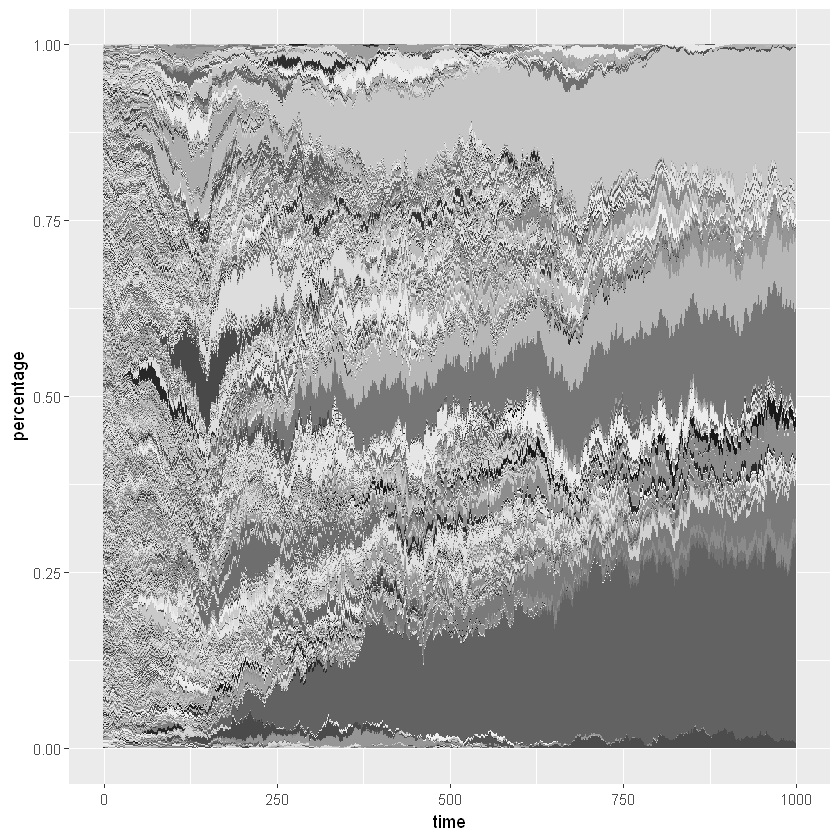

In [194]:
sub_data = all_data %>% filter(time < 1000)
n_sub = length(unique(sub_data$expression))
p <- ggplot(sub_data) + 
        geom_col(aes(x = time, y=percentage, fill=expression )) + 
        theme(legend.position = "none") + 
        scale_fill_grey(start = 0.05, end = 0.95, limits = sample(unique(sub_data$expression), n_sub, replace=FALSE))
        # scale_fill_rainbow()
p

In [195]:
g <- ggplot_build(p)
these_colors = unique(g$data[[1]][["fill"]])
exprs = unique(all_data$expression)
#print(these_colors)
all_colors = sample(these_colors, length(exprs), replace=TRUE)
names(all_colors) = exprs

#print(all_colors)


In [196]:

for (e in expr_targets){
    all_colors[e] = target_colors[e]
}

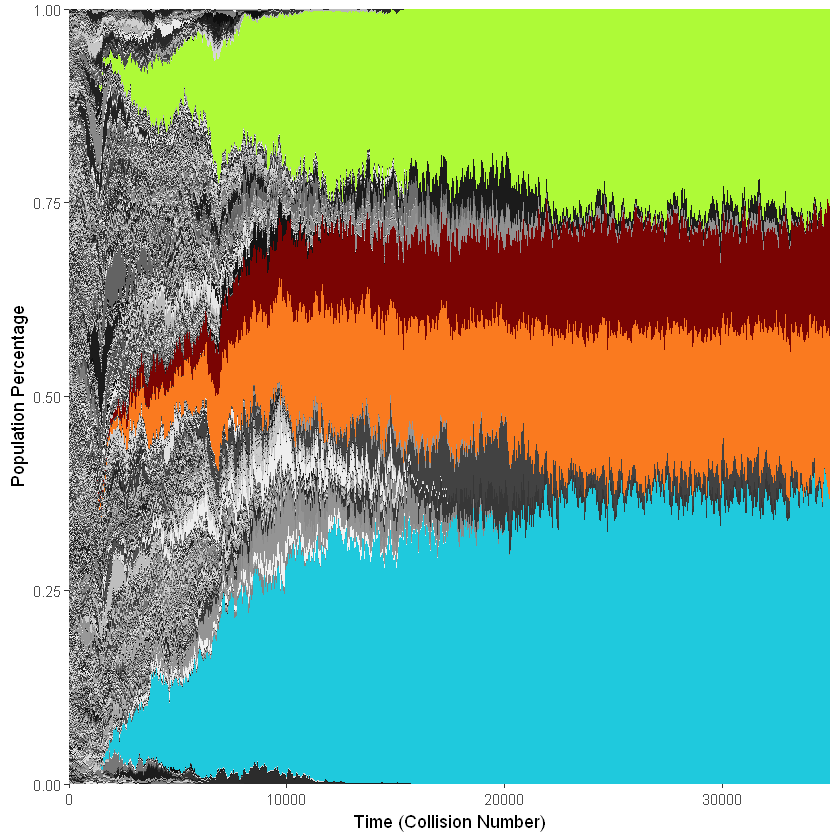

In [197]:
sub_data = all_data %>% filter(time < 3500)
n_sub = length(unique(sub_data$expression))
q <- ggplot(sub_data) + 
        geom_area(aes(x = 10*time, y=percentage, fill=expression ), na.rm=TRUE,position="fill") + 
        theme(legend.position = "none") + 
        scale_fill_manual(values=all_colors) +
        scale_x_continuous(expand= c(0,0)) + 
        scale_y_continuous(expand= c(0,0)) + 
        labs(x = "Time (Collision Number)", y = "Population Percentage")
        # scale_fill_rainbow()
q


In [198]:
ggsave("Example_TS_v2.svg",q, height = 247/4, width = 183/2 , units = "mm")

\\x1.x1 
"#979797"

In [190]:
viridis(4, alpha = 1, begin = 0.275, direction = 1.0, option  = "H")

[1] "#1FC9DDFF" "#AEFA37FF" "#FA7A1FFF" "#7A0403FF"

In [156]:
library(viridisLite)

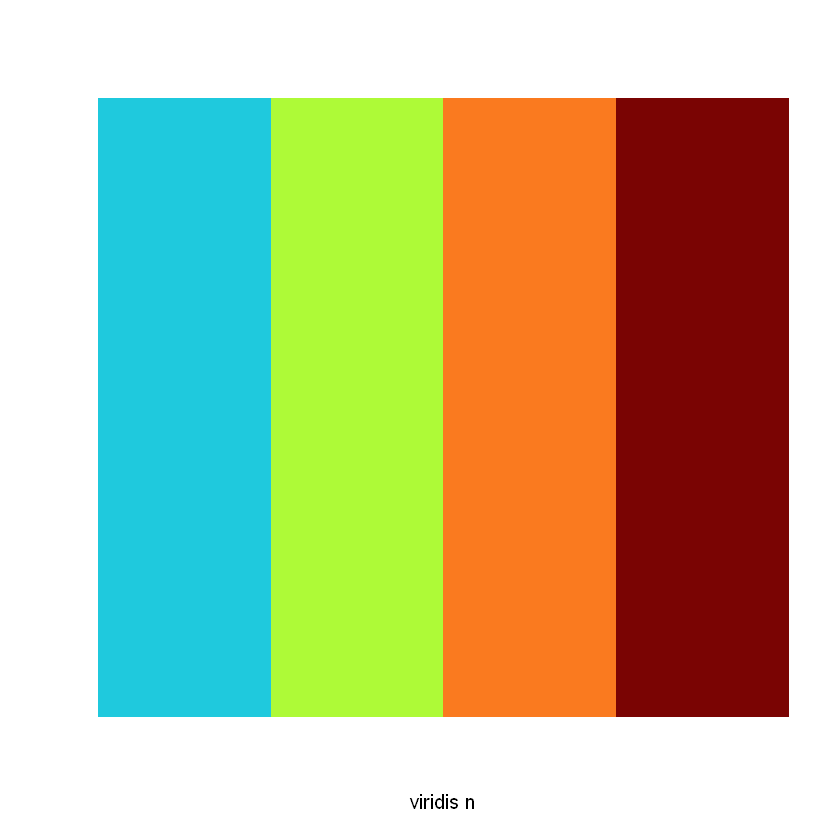

In [189]:
n =4
image(
  1:n, 1, as.matrix(1:n),
  col = viridis(n, begin = 0.275, option = "H"),
  xlab = "viridis n", ylab = "", xaxt = "n", yaxt = "n", bty = "n"
)